**Деревья принятия решений** (1 балл) Зенков М.А.

*Дерево приятия решений* или *Решающее дерево* - это модель, которая используется в машинном обучении, анализе данных и статистике.

Решающее дерево представляет собой бинарное дерево в узлах и корне которого заключены некоторые условия. 


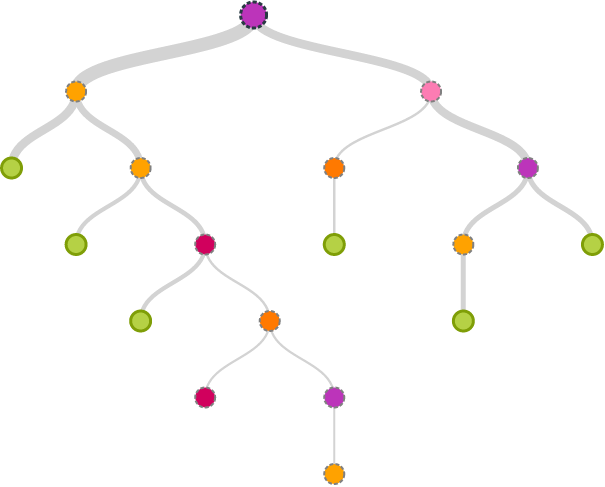

Когда объект выборки попадает в дерево, он "просеивается" через череду этих условий.

В зависимости от значений признаков, объект в итоге оказывается в том или ином листе дерева.

В листах дерева находятся прогнозы и когда объект попадает в лист ему сопоставляется некоторый константный прогноз (для регрессии - число, для классификации - класс).

Пример решающего дерева представлен на рисунке ниже:

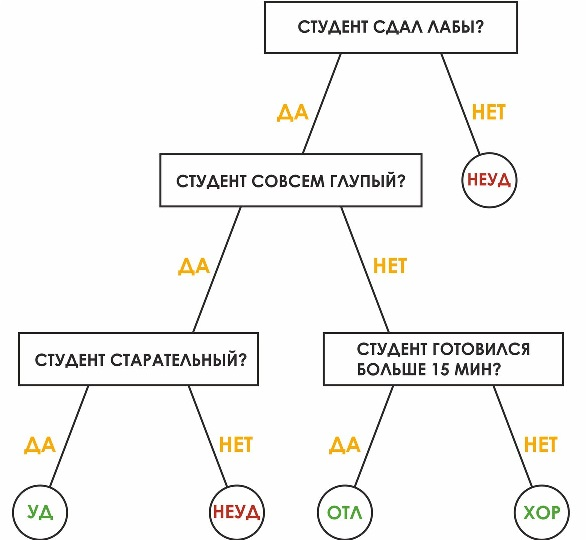

Условие в узле - это *предикат*, логическое высказывание о значении признака  объекта. 

Высказывание имеет вид:
"Значение признака А меньше (или больше) порога t"

В зависимости от значения признака предикат возвращает нам ответ 1 или 0

1 - высказываение истинно, объект отправляется в левое поддерево;

0 - высказывание ложно и объект идет в правое поддерево.

Пусть у нас есть студент со значениями признаков: "умный","сдал лабы","готовился 5 минут". Промоделируем работу дререва с картинки выше на нашем студенте.

*мы не приветствуем опыты над людьми, эксперимент проводился с согласия пациента!!!*

1. На первом шаге проверяем "сдал ли студент лабы?" - ДА, сдал, ему повезло. Студент отправляется влево. 
2. Теперь смотрим "глупый ли студент?" - НЕТ, студент умный и попадает в правое поддерево.
3. И последнее. "студент готовился более 15 минут?" - НЕТ, 5 минут меньше чем 15 минут. Либо наш студент слишком умный, либо он уже заранее подготовился. Тем не менее он получит оценку "ХОРОШО".



С предикатами разобрались, осталось понять как их найти.

**Как подобрать наилучший предикат для вершины?**

Во время поиска предиката мы перебираем все признаки объекта и пороги, составляем предикат и используем его для разбиения выборки. Чтобы понять какой признак и порог взять нам понадобятся оценить разбиение с помошью метрики или критерия.

Для этой задачи хорошо подойдут *Энтропия* и *Критерий Джини*

**Энтропия**

В математической статистике энтропия — мера неопределённости распределения вероятностей, мера неопределенности исхода эксперимента.

Предполоджим, у нас есть две монеты. Оригинальная из однородного сплава и подделка, у которой один край тяжелее другого. 

Когда мы подкидываем нормальную монетку, мы не знаем, какой стороной она выпадет. Вернее, мы знаем что шансы у обоих сторон равны (50%).
У подделки одна половина тяжелее и подкидывая эту монету, мы заранее знаем, какой стороной она упадет.

Распределение исходов эксперимента и их вероятностей:

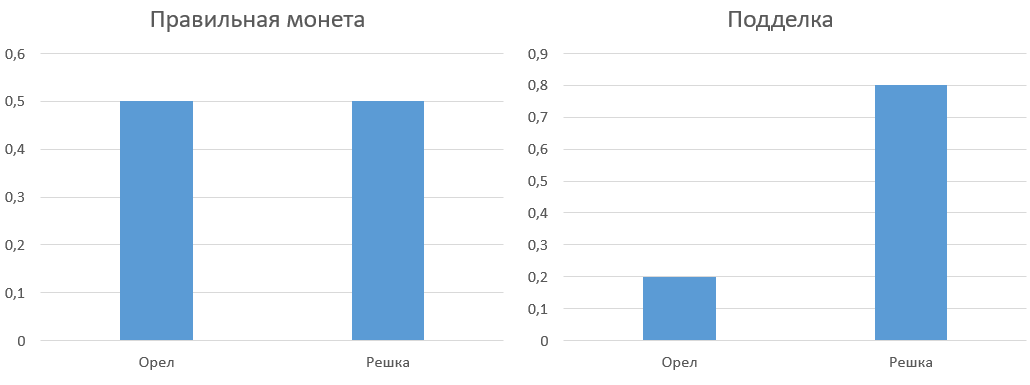

Когда мы подкинули правильную монету и увидели результат, мы получили новую информацию. Когда же мы подкинем подделку, никакой новой информации мы не получим, мы и так знаем исход эксперимента.

У правильной монеты высокая энтропия, а у подделки низкая.

Энтропия считается по следующей формуле:

$H(p_1,\ldots,p_n)=-\sum_{i=1}^n p_i\log_2{p_i}$ где $p_1,\ldots,p_n$ - вероятности исходов

В случае $p_i = 0$ мы пропускаем слагаемое (подразумеваем, что неопределенность равна нулю)

Число исходов эксперимента - количество классов k, а вероятность класса $p_k$ - доля объектов этого класса в вершине.

$p_k=\frac{1}{|R|}\sum_{(x_i,y_i)\in R}[y_i=k]$

Если в вершине объекты только одного класса, энтропия нулевая. Максимальное значение энтропии зависит от числа классов и достигается при равном числе объектов каждого класса.

**Критерий Джини**

Данный критерий считается похожим образом

$H(p_1,\ldots,p_k)=-\sum_{i=1}^K p_i(1-p_i)$ где $p_1,\ldots,p_k$ - вероятности исходов

Интрепретация следующая: если мы создадим случайный классификатор, который будет выдавать класс K с вероятностью $p_k$, вероятность ошибки данного классификатора будет вычисляться по этой формуле.

Когда в вершине находятся объекты только одного класса, то ошибка будет нулевая (как и энтропия). Если объектов каждого класса поровну, ошибка будет максимальной.

Выбор конкретного критерия не принципиален. Оба критерия оценивают вырожденность распределения и штрафуют за близость к равномерному распределению.

**Оценка разбиений**

Умножаем хаотичность новой вершины на долю объектов из исходной вершины которые ушли в новую вершину. Стремимся чтобы сумма полученных хаотичностей для левой и правой вершины была минимальна.

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:
$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

Теперь с помоью этой формулы попробуем сравнить два разбиения:

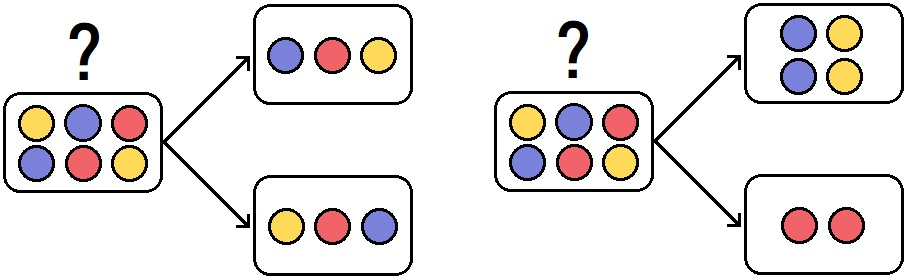

В первом случае получается:

$$\frac{1}{2}*(-(\frac{1}{3}*\log_2{(\frac{1}{3})*3}))+\frac{1}{2}*(-(\frac{1}{3}*\log_2{(\frac{1}{3})*3}))=1,58$$

Во втором случае:

$$\frac{2}{3}*(-(\frac{1}{2}*\log_2{(\frac{1}{2})*2}))+\frac{1}{3}*(-(1*\log_2{(1)}))=0,67$$

Второе разбиение получилось лучше чем первое.

**Сколько строить дерево? Когда остановиться?**

Мы делаем разбиения до тех пор пока не выполнится некоторое условие.

Подобным условием может быть:
1.   Максимальная глубина дерева (гиперпараметр 'max_depth');
2.   Количество листьев дерева (гиперпараметр 'max_leaf_nodes');
3.   Минимальное число объектов в вершине для оччередного разбиения (гиперпараметр 'min_samples_leaf');
4.   Минимальное уменьшение "хаотичности" при разбиении (гиперпараметр 'min_impurity_decrease').



Алгоритм рабты следующий:
1.   В первой вершине все объекты обучающей выборки;
2.   Начинаем разбиение;
3.   Проверяем условие остановки (если да, то выходим);
4.   Ищем лучший предикат;
5.   Разбиваем вершину на две предикатом;
6.   Повторяем шаги 3-5 для двух новых вершин.



**Когда применять решающие деревья?**

Если есть сложные нелинейные зависимости. Чаще используются не сами деревья, а методы на основе объединения деревьев (Бустинг и Случайные леса).

Импортируем нужные нам библиотеки. Обычно это делают в самом начале файла, но мы сделаем это здесь.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

Устновим фиксированный размер графиков

In [2]:
plt.rcParams['figure.figsize'] = (11, 6.5)

С помощью numpy сгенерируем искусственную выборку:

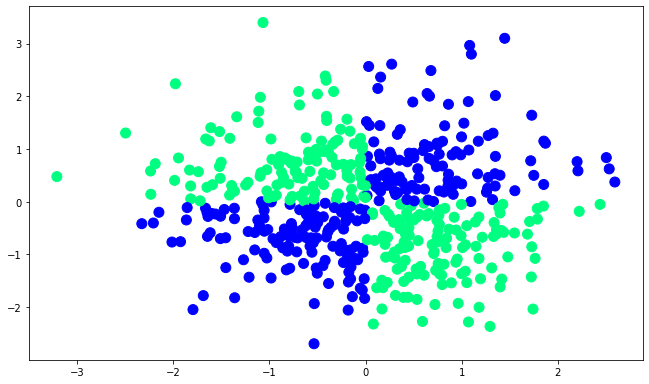

In [3]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

Поделим выборку на обучающую и тестовую часть

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

Создадим экземплар регрессии, обучим его и посмотрим результаты

In [5]:
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)

0.392

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


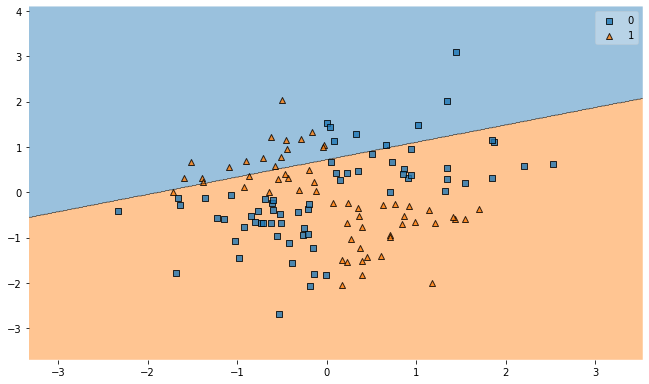

In [6]:
plot_decision_regions(X_test, y_test, lr)
plt.show()

Зависимость нелинейная и одной прямой хорошо разделить объекты выборки не получилось.

Сделаем тоже самое для решающего дерева

In [7]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)

0.968

Результат значительно лучше, чем у регрессии.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


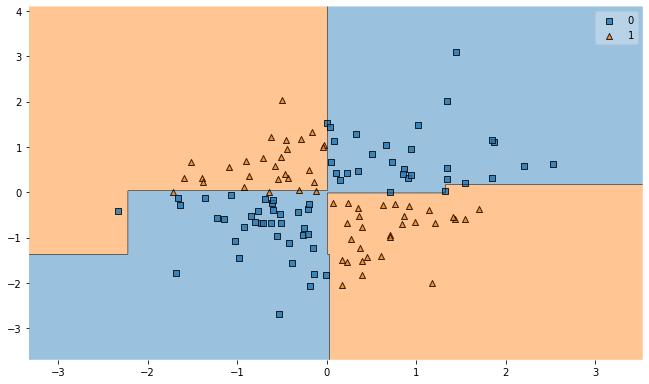

In [8]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

## Переобучение деревьев

Переобучение - ситуация, при которой модель не находит реальные зависимости и закономерности, а просто подстраивается под выборку (запоминает объекты). На обучающей части она может давать отличные результаты, но на тестовой будет работать плохо.

Создадим новую более сложную выборку

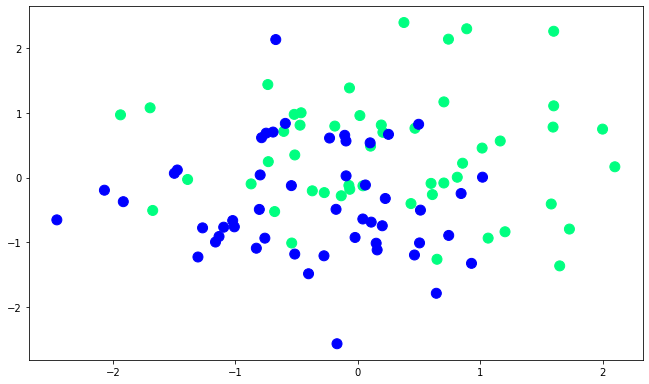

In [9]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

Гиперпараметры - параметры алгоритмов, значения которых устанавливаются перед запуском процесса обучения. У дерева тоже есть гиперпараметры.

Давайте посмотрим, какие гиперпараметры есть у деревьев:

In [10]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 13,
 'splitter': 'best'}

Их здесь много, есть также ранне описанные критерии останова. Рассмотрим  max_depth и min_samples_leaf



- `max_depth`: ограничение на максимальную глубину дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой


Посмотрим, как изменение этих гиперпараметров влияет на результаты работы дерева. Возьмем органичения по глубине 3, 5, и "без ограничения", по минимальному числу объектов в вершине возьмем 1, 5, 15 объектов.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

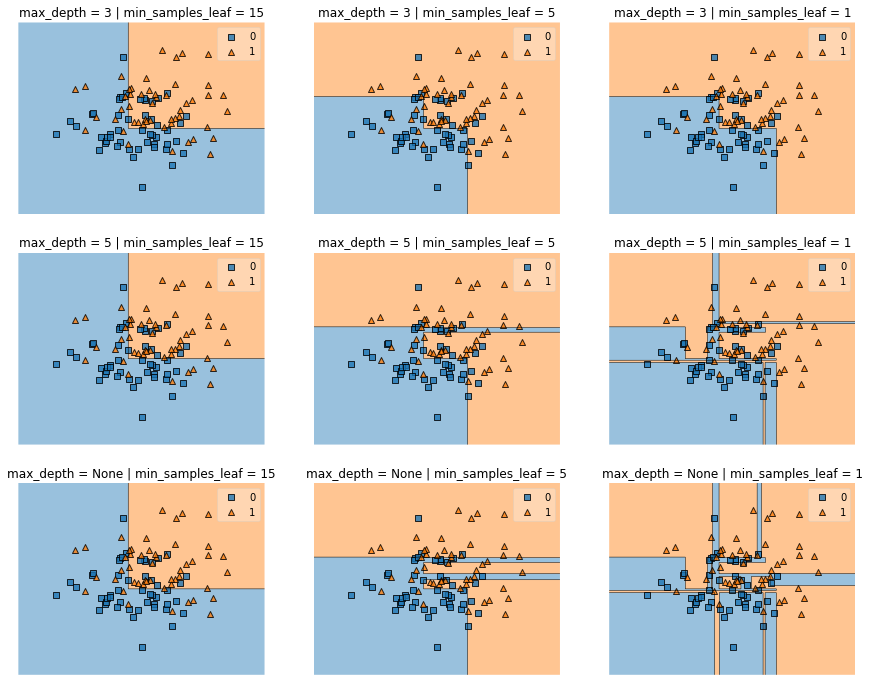

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
        ax[i][j].axis('off')
        plot_decision_regions(X, y, dt, ax=ax[i][j])
plt.show()

При большом минимальном количестве объектов в вершине независимо от глубины получается относительно простое дерево (ограничения слишком жесткие и дерево не дообучается, не может усложниться).

При минимальном количестве объектов равном 5 с ростом глубины появляются аномалии (дерево начинает переобучаться и реагировать на выбросы).

При отсутствии ограничений по количеству объектов в вершине с ростом глубины дерево еще быстрее переобучается.

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


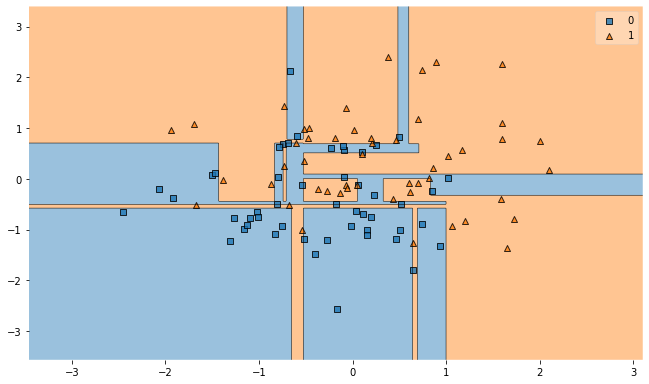

In [12]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
dt.fit(X, y)
plot_decision_regions(X, y, dt)
plt.show()

In [13]:
accuracy_score(y, dt.predict(X))

1.0

Дерево максимально переобучено. Однако оно не сможет корректно работать на реальных тестах, т.к. модель зафиксировала зависимости, которых на самом деле нет и подстроилась под объекты, которые нужно было игнорировать (выбросы).

## Неустойчивость деревьев

Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

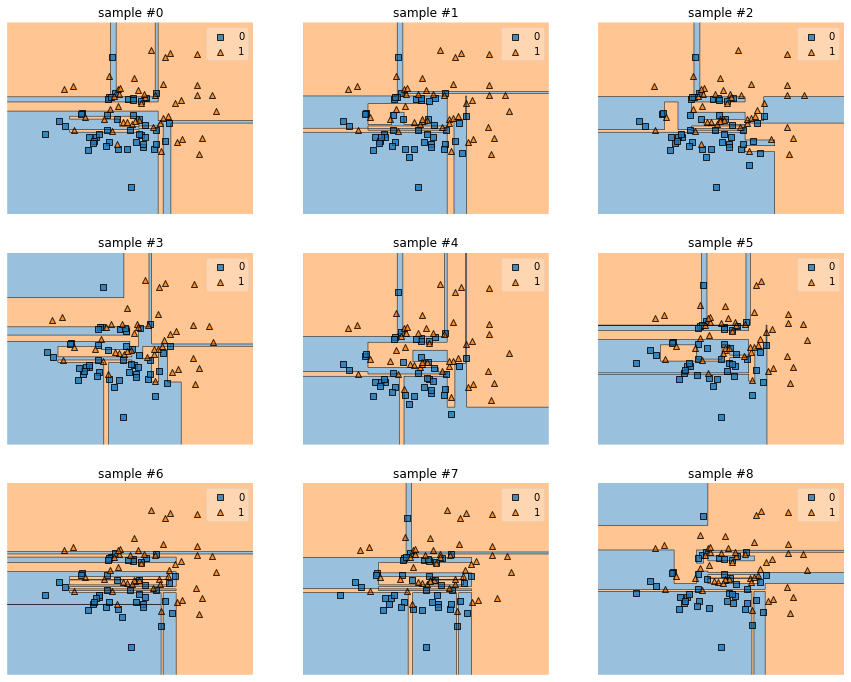

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title('sample #{}'.format(seed_idx))
        ax[i][j].axis('off')
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])
plt.show()

Деревья неустойчивы к составу выборки и малейшие изменения в составе выборки могут сильно изменить структуру дерева.

## Практика

In [15]:
import pandas as pd
from sklearn.datasets import load_boston

Получим готовый набор данных с ценами домов в Бостоне

In [16]:
boston = load_boston()

In [17]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Выведем опсание датасета на экран

In [18]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Выведем названия признаков (столбцы)

In [19]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Посмотрим на размер датафрейма

In [21]:
X.shape

(506, 13)

In [22]:
y = boston['target']
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [23]:
y.shape

(506,)

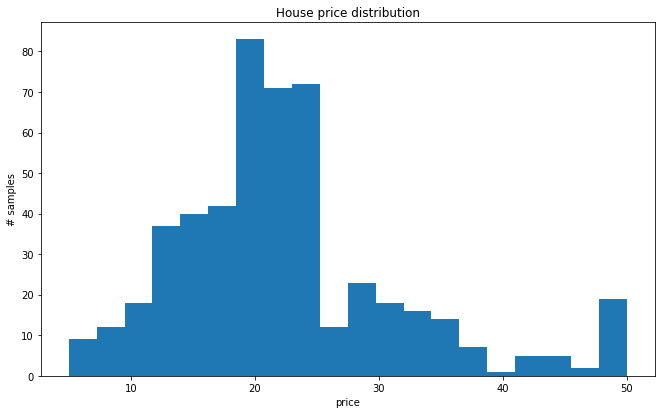

In [24]:
plt.title('House price distribution')
plt.xlabel('price')
plt.ylabel('# samples')
plt.hist(y, bins=20)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

## Реализация решающего дерева

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

Реализуйем подсчет критерия ошибки с помощью формулы выше. Реализуем функции для подсчета значения критерия информативности, а также для разбиения вершины.

In [26]:
#R - датафрейм
def H(R):
    if len(R)==0:
        return 0
    #обращаемся к элементам целевой переменной по тем индексам, которые лежат в R
    #вычисляем дисперсию
    return y[R.index].var(ddof=0)


def split_node(R_m, feature, t):
    #в левое поддерево идут элементы у которых значение признака feature меньше чем порога t
    R_l = R_m[R_m[feature] < t]
    #а в правое те у которых больше или равно
    R_r = R_m[R_m[feature] >= t]
    return R_l,R_r


def q_error(R_m, feature, t):
    #вызываем метод 
    R_l,R_r = split_node(R_m, feature, t)
    #оцениваем ошибку с помощью формулы выше
    Q=len(R_l)/len(R_m) * H(R_l) + len(R_r)/len(R_m) * H(R_r)
    return Q

Переберем все возможные разбиения выборки по одному из признаков и построем график критерия ошибки в зависимости от значения порога.

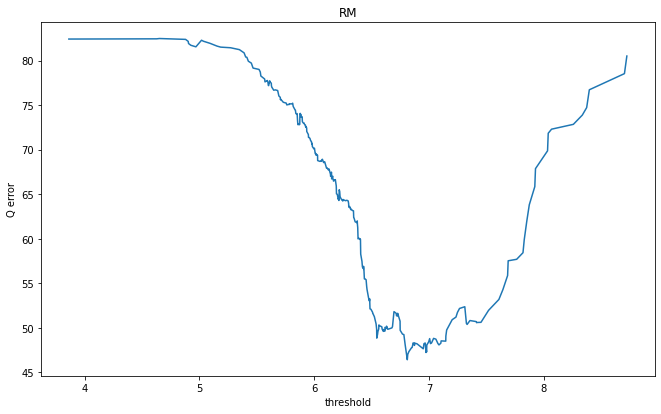

In [27]:
feature = 'RM'
Q_array = []
feature_values = np.unique(X_train[feature])[1:]
for t in feature_values:
    Q_array.append(q_error(X_train, feature, t))
plt.plot(feature_values, Q_array)
plt.title(feature)
plt.xlabel('threshold')
plt.ylabel('Q error')
plt.show()

Самое малое значение ошибки достигается при значении порога ~6,8

In [28]:
#найдем этот порог
def get_optimal_split(R_m, feature):
    Q_array = []
    feature_values = np.unique(R_m[feature])[1:]
    for t in feature_values:
        Q_array.append(q_error(R_m, feature, t))
    opt_threshold_index = np.argmin(Q_array)
    opt_threshold = feature_values[opt_threshold_index]
    return opt_threshold, Q_array

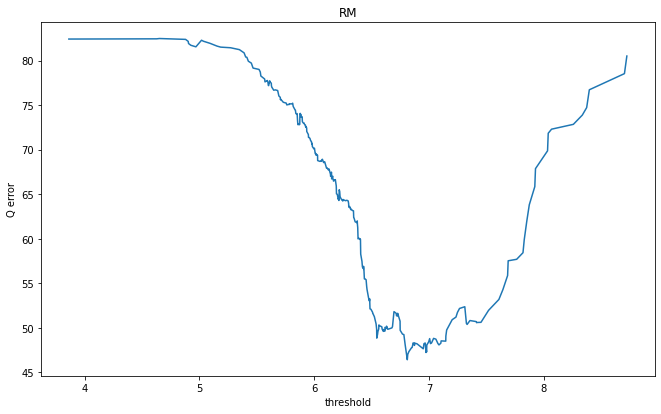

In [29]:
t, Q_array = get_optimal_split(X_train, feature)
plt.plot(np.unique(X_train[feature])[1:], Q_array)
plt.title(feature)
plt.xlabel('threshold')
plt.ylabel('Q error')
plt.show()

Построим графики критерия ошибки (в зависимости от количества объектов в левом поддереве) для каждого из признаков. Найдем признак, показывающий наилучшее качество. Также построим график критерия ошибки для данного признака в зависимости от значения порога.

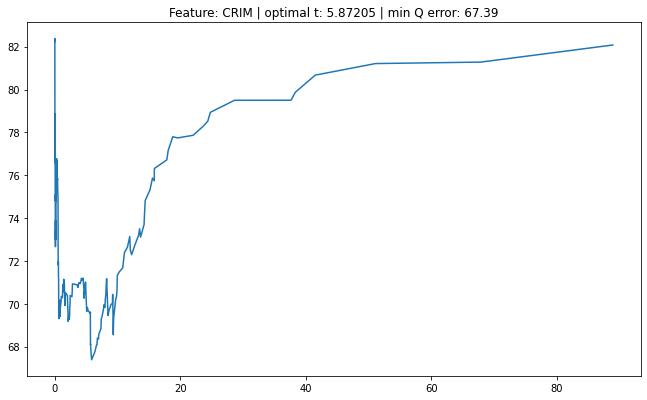

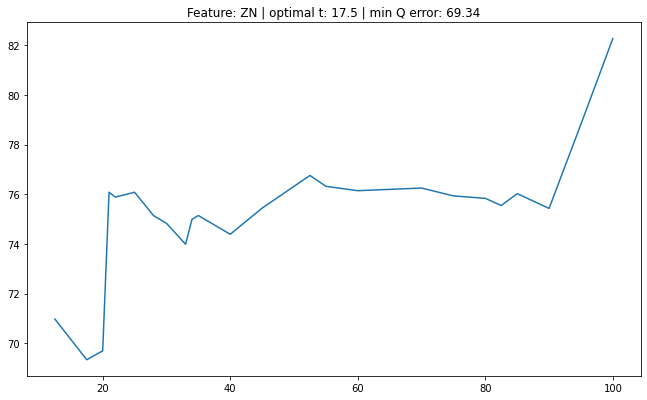

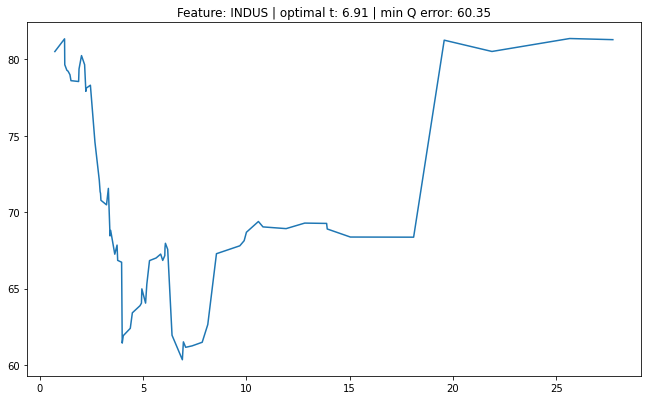

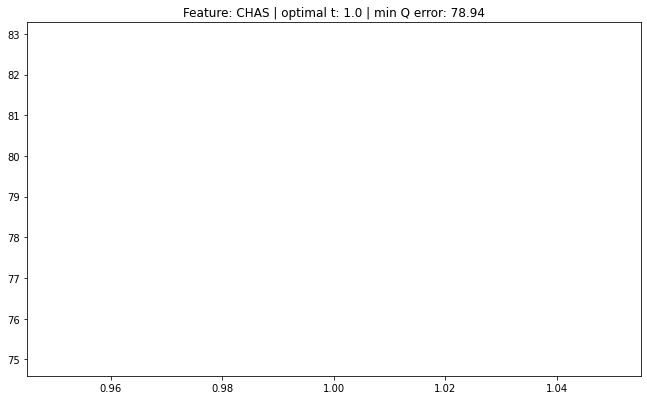

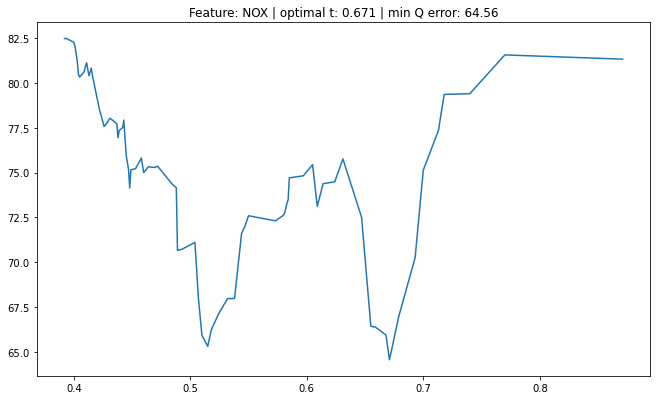

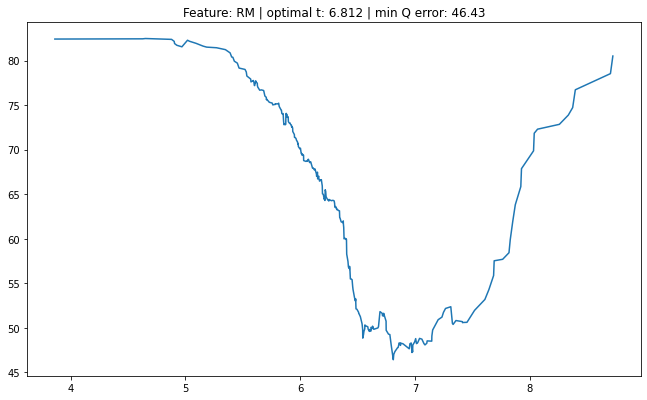

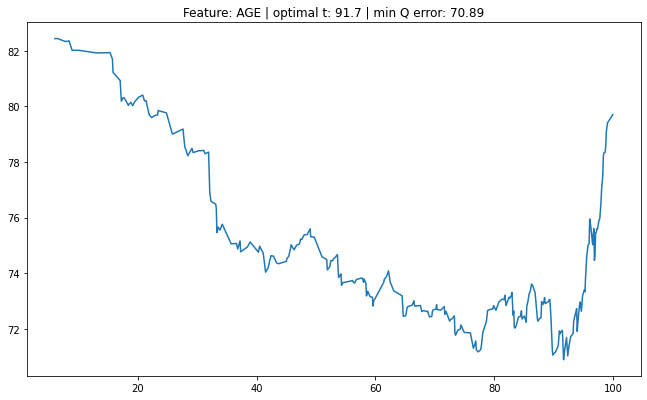

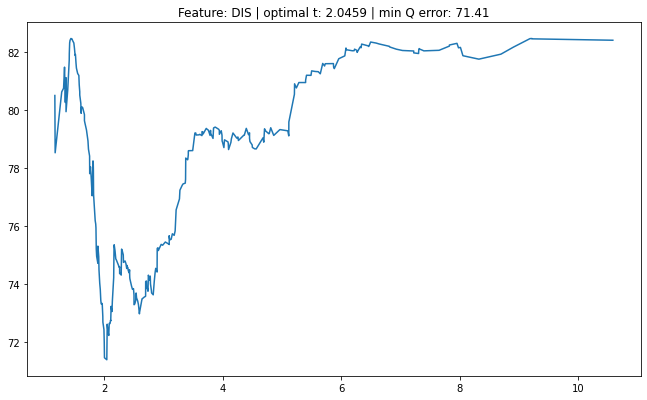

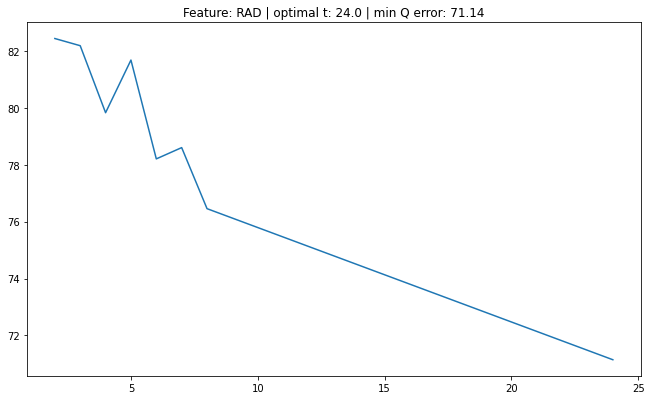

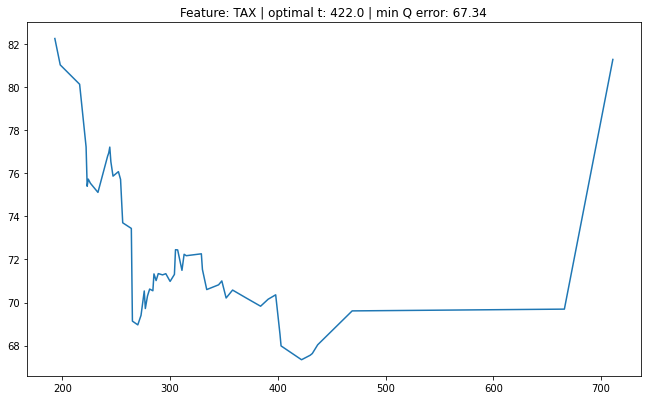

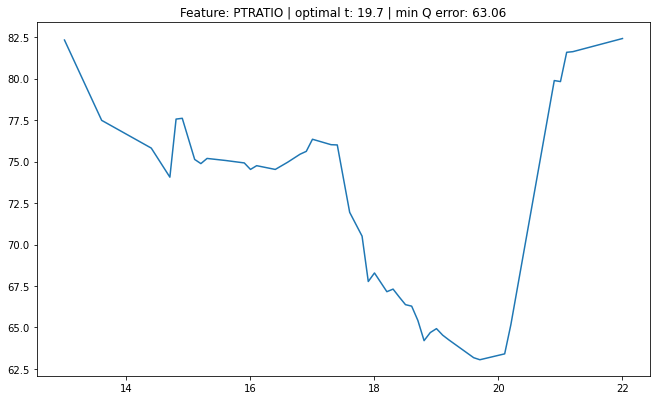

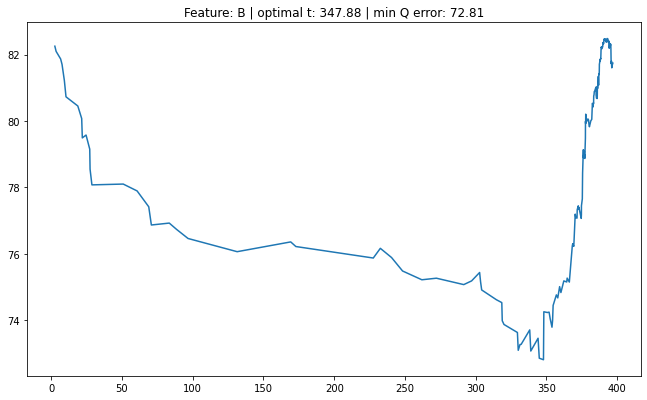

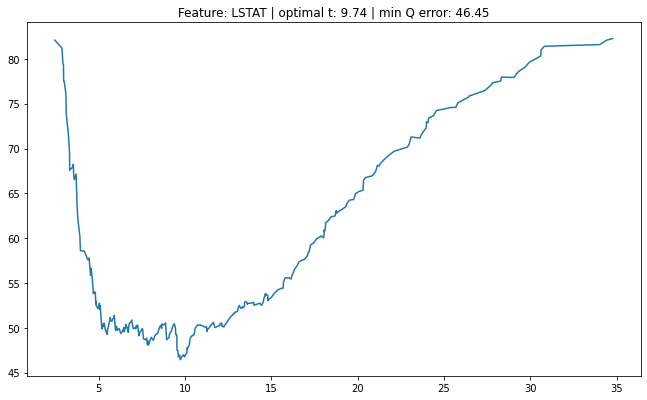

In [30]:
results = []
#колонки обучающей части - признаки
#пройдем по всем признакам, найдем оптимальный порог и оптимальный признак
for f in X_train.columns:
    t, Q_array = get_optimal_split(X_train, f)
    min_error = min(Q_array)
    results.append((f, t, min_error))
    plt.figure()
    plt.title('Feature: {} | optimal t: {} | min Q error: {:.2f}'.format(f, t, min_error))
    plt.plot(np.unique(X_train[f])[1:], Q_array)
    plt.show()

In [31]:
#мы получили список признаков, их оптимальных порогов и значений ошибки при данных порогах
results = sorted(results, key=lambda x: x[2])
results

[('RM', 6.812, 46.42614228882214),
 ('LSTAT', 9.74, 46.448000769349775),
 ('INDUS', 6.91, 60.347526495859015),
 ('PTRATIO', 19.7, 63.055920087579615),
 ('NOX', 0.671, 64.56169489613504),
 ('TAX', 422.0, 67.3415667505267),
 ('CRIM', 5.87205, 67.39254669771015),
 ('ZN', 17.5, 69.34076590623248),
 ('AGE', 91.7, 70.88908265552672),
 ('RAD', 24.0, 71.1383664054875),
 ('DIS', 2.0459, 71.40506193171146),
 ('B', 347.88, 72.81105281163394),
 ('CHAS', 1.0, 78.93996784223368)]

In [32]:
pd.DataFrame(results, columns=['feature', 'optimal t', 'min Q error'])

,feature,optimal t,min Q error
0,RM,6.81200,46.426142
1,LSTAT,9.74000,46.448001
2,INDUS,6.91000,60.347526
3,PTRATIO,19.70000,63.055920
4,NOX,0.67100,64.561695
5,TAX,422.00000,67.341567
6,CRIM,5.87205,67.392547
7,ZN,17.50000,69.340766
8,AGE,91.70000,70.889083
9,RAD,24.00000,71.138366


In [33]:
#оптимально будет взять признак RM с порогом 6,812
#нам нужен признак с минимальным значением критерия ошибки
optimal_feature, optimal_t, optimal_error = results[0]

Визуализируем разбиение. Построим диаграмму рассеяния целевой переменной в зависимости от значения признака RM. Проведем вертикальную линию, соответствующую порогу разбиения. 

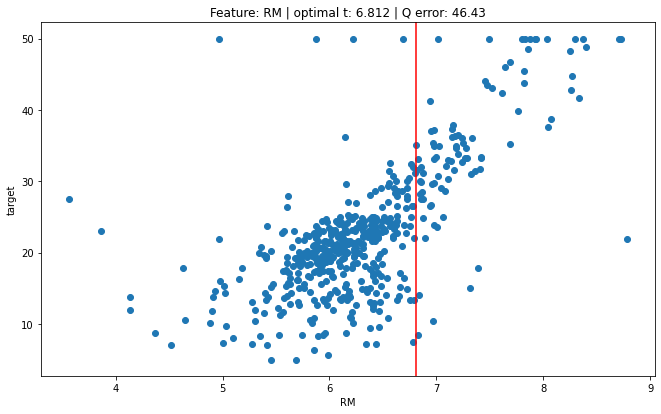

In [34]:
plt.scatter(X[optimal_feature], y)
plt.axvline(x=optimal_t, color="red")
plt.xlabel(optimal_feature)
plt.ylabel('target')
plt.title('Feature: {} | optimal t: {} | Q error: {:.2f}'.format(optimal_feature, optimal_t, optimal_error))
plt.show()

## Решающее дерево из sklearn

In [35]:
from sklearn.tree import DecisionTreeRegressor

#создадим экземпляр дерева, зафиксируем random_state и ограничим глубину до 3
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
#обучаем методом fit
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

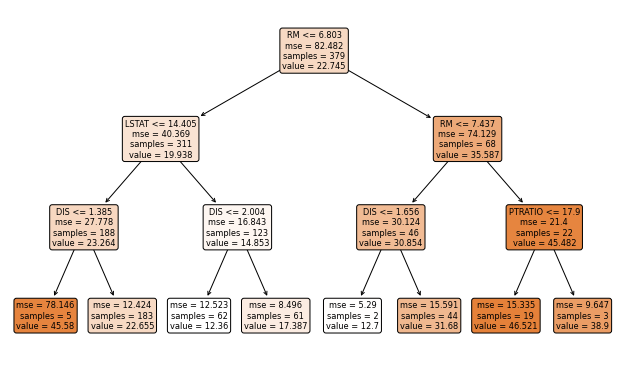

In [36]:
from sklearn.tree import plot_tree

#визуализируем построенное дерево
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

В узлах записаны признаки, их пороги, количество объектов попавших в узел и значение ошибки.

Важное замечание: как и наше самодельное дерево, DecisionTreeRegressor подобрал для первого разбиения признак **RM** с порогом близким к **6,8**

Посчитаем среднюю квадратичную ошибку на обучающей выборке:

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt.predict(X_test))

37.7071346843913

Посмотрим, как зависит значение ошибки от глубины дерева и найдем оптимальную глубину:

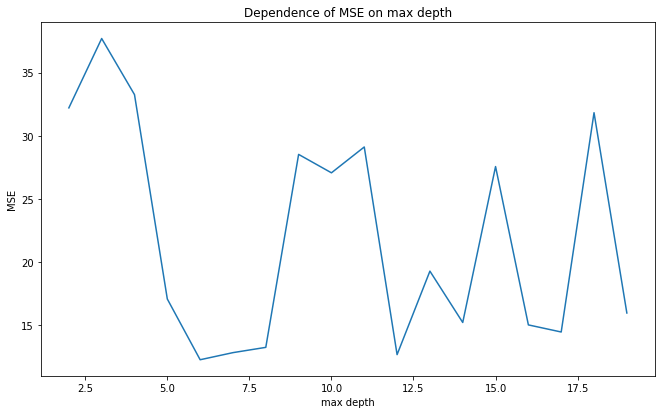

In [38]:
max_depth_array = range(2, 20)
mse_array = []
for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(max_depth_array, mse_array)
plt.title('Dependence of MSE on max depth')
plt.xlabel('max depth')
plt.ylabel('MSE')
plt.show()

In [39]:
pd.DataFrame({
    'max_depth': max_depth_array,
    'MSE': mse_array
}).sort_values(by='MSE').reset_index(drop=True)

,max_depth,MSE
0,6,12.259769
1,12,12.665018
2,7,12.822513
3,8,13.240638
4,17,14.457098
5,16,15.019728
6,14,15.211367
7,19,15.962205
8,5,17.071137
9,13,19.278823


Самая малая ошибка достигается при глубине равной 6

Теперь посмотрим на зависимость ошибки от числа объектов в листе:

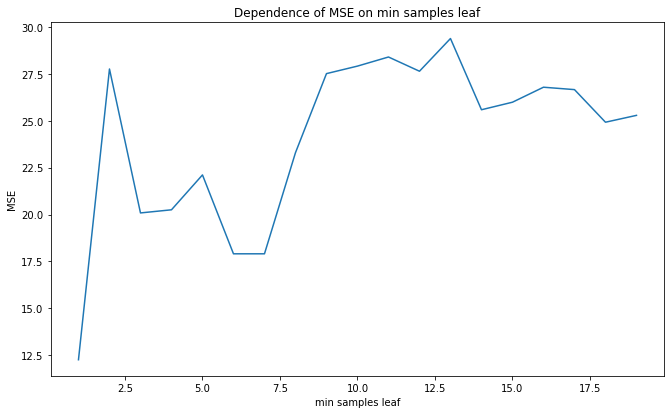

In [40]:
min_samples_leaf_array = range(1, 20)
mse_array = []
for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_leaf_array, mse_array)
plt.title('Dependence of MSE on min samples leaf')
plt.xlabel('min samples leaf')
plt.ylabel('MSE')
plt.show()

Самое оптимальное значение = 1

Минимальное число объектов в вершине, необходимое для разбиения вершины:

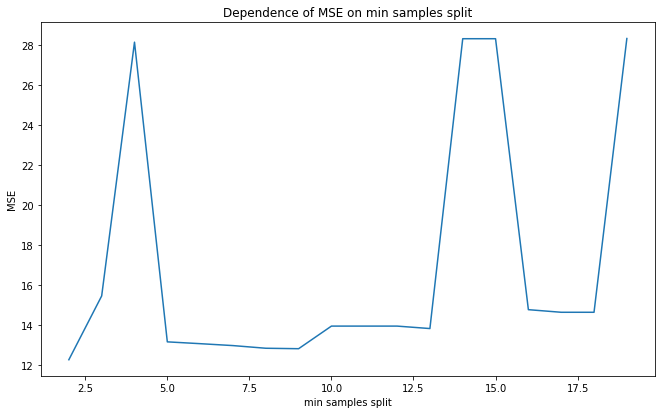

In [41]:
min_samples_split_array = range(2, 20)
mse_array = []
for min_samples_split in min_samples_split_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_split=min_samples_split, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_split_array, mse_array)
plt.title('Dependence of MSE on min samples split')
plt.xlabel('min samples split')
plt.ylabel('MSE')
plt.show()

Рассмотрим самое оптимальное дерево глубины 6

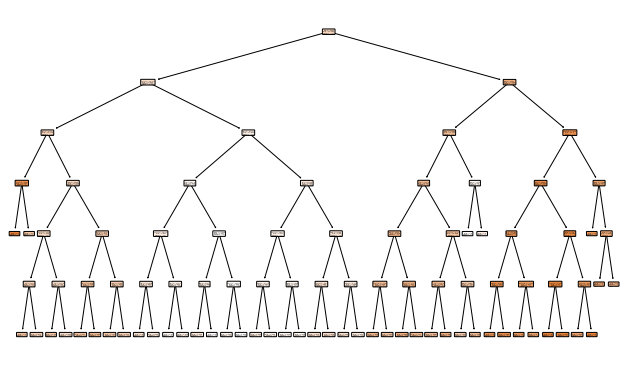

In [42]:
dt = DecisionTreeRegressor(max_depth=6, random_state=13)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

Дерево большое и записи в вершинах увидеть не получится.

In [43]:
mean_squared_error(y_test, dt.predict(X_test))

12.259769039156408

## Важность признаков

Важность признаков показывает, как сильно отдельный признак влияет на итоговый прогноз. Наиболее важные признаки, которые вносят наибольший вклад в прогноз, а от менее важных можно избавиться.

Важность вычисляется на основе того, как часто признак встречается в разбиениях.

С помощью feature_importances_ получим важность признаков

In [44]:
dt.feature_importances_

array([0.0017915 , 0.        , 0.00353474, 0.        , 0.02687167,
       0.59766384, 0.00478304, 0.11292126, 0.0035135 , 0.02381713,
       0.0062183 , 0.00726   , 0.21162502])

In [45]:
pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,RM,0.597664
1,LSTAT,0.211625
2,DIS,0.112921
3,NOX,0.026872
4,TAX,0.023817
5,B,0.007260
6,PTRATIO,0.006218
7,AGE,0.004783
8,INDUS,0.003535
9,RAD,0.003514


Как можно видеть, первый выбранный для разбиения признак (RM) оказался самым важным.

Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [46]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
207,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4.0,277.0,18.6,389.43,18.06
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00


In [47]:
#проведем препроцессинг, масштабируем признаки
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,-0.382049,0.606785,-0.848363,-0.260011,-0.851779,-0.488599,0.896957,1.486665,-0.159888,-0.690253,0.592093,0.185671,0.285327
97,-0.388162,-0.486443,-1.176083,-0.260011,-0.922106,2.624087,0.271248,-0.164958,-0.859089,-0.737557,-0.214771,0.404139,-1.192625
13,-0.327024,-0.486443,-0.407990,-0.260011,-0.104556,-0.513761,-0.239387,0.437534,-0.626022,-0.554256,1.209107,0.404139,-0.607512
207,-0.372405,-0.486443,-0.049546,-0.260011,-0.535308,-0.759460,0.152580,0.262298,-0.626022,-0.731644,0.070004,0.317425,0.808317
110,-0.389711,-0.486443,-0.346542,-0.260011,-0.262791,-0.149652,-0.505493,-0.521493,-0.509488,-0.098960,1.161645,0.364554,0.077287


Обучим модели на оригинальной выборке и на масштабированной выборке.

In [48]:
# без масштабирования
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test)))

37.7071346843913
12.259769039156408


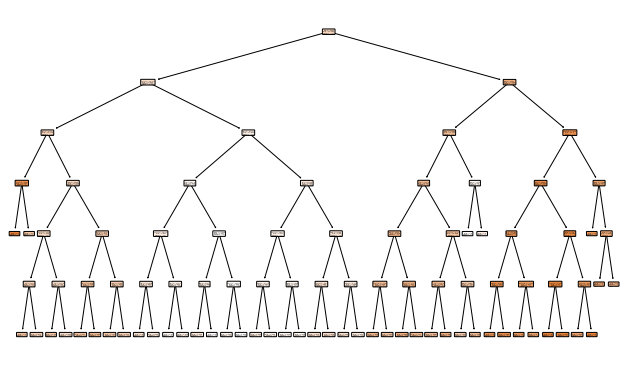

In [49]:
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [50]:
# с масштабированием
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test_scaled)))

37.7071346843913
12.259769039156408


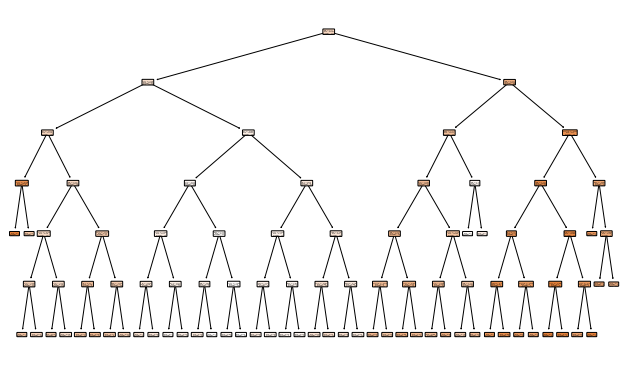

In [51]:
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

Структура дерева осталась та же, изменились только значения порогов в предикатах. Хотя система координат изменилась, положение объектов относительно друг друга осталось прежним (если значение признака объекта А было больше чем у объекта В, то оно и останется больше).